<a href="https://colab.research.google.com/github/nanpolend/machine-learning/blob/master/TensorFlow_Gemini%E4%BF%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8803 - loss: 0.4198 - val_accuracy: 0.9619 - val_loss: 0.1282
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9697 - loss: 0.1052 - val_accuracy: 0.9697 - val_loss: 0.0951
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9796 - loss: 0.0659 - val_accuracy: 0.9721 - val_loss: 0.0905
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9851 - loss: 0.0471 - val_accuracy: 0.9741 - val_loss: 0.0810
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9905 - loss: 0.0313 - val_accuracy: 0.9785 - val_loss: 0.0773


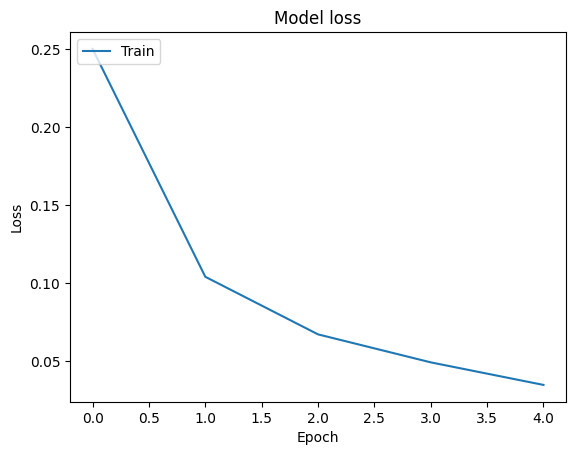

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 將 [0, 1, 2, 3] 轉換為 one-hot 編碼，num_classes 指定類別數量
tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=9)

# 載入 MNIST 手寫數字資料集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 將訓練集和測試集的影像像素值正規化到 0-1 之間
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 將訓練集和測試集的標籤轉換為 one-hot 編碼
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# 建立一個序列模型 (Sequential)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

# 繪製訓練損失圖
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# 評估模型
score = model.evaluate(x_test_norm, y_test, verbose=0)